In [62]:
# importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from zipfile import ZipFile
import sqlite3

In [63]:
#Loading datasets
movie_Budgets= pd.read_csv('../data/tn.movie_budgets.csv' )
tmdb_movies= pd.read_csv('../data/tmdb.movies.csv')

In [64]:
movie_Budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [65]:
movie_Budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [66]:
movie_Budgets.shape

(5782, 6)

In [67]:
movie_Budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [68]:
movie_Budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [69]:
movie_Budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [70]:
movie_Budgets.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [71]:
movie_Budgets.duplicated().sum()

0

In [72]:
# Converting date columns to datetime
movie_Budgets['release_date'] = pd.to_datetime(movie_Budgets['release_date'])
movie_Budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [73]:
# Cleaning and removing dollar signs from specific columns
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

# Apply the cleaning to each column in the list
movie_Budgets[columns_to_clean] = movie_Budgets[columns_to_clean].replace('[\$,]', '', regex=True).astype(float)

movie_Budgets.describe()

,id,release_date,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5782,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,2004-07-06 05:20:31.546177792,3.158776e+07,4.187333e+07,9.148746e+07
min,1.000000,1915-02-08 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,2000-04-22 18:00:00,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,2007-03-02 00:00:00,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,2012-12-25 00:00:00,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,2020-12-31 00:00:00,4.250000e+08,9.366622e+08,2.776345e+09
std,28.821076,NaN,4.181208e+07,6.824060e+07,1.747200e+08


In [74]:
movie_Budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [75]:
movie_Budgets_clean = movie_Budgets[columns_to_clean]

In [76]:
movie_Budgets_clean.corr()

,production_budget,domestic_gross,worldwide_gross
production_budget,1.000000,0.685682,0.748306
domestic_gross,0.685682,1.000000,0.938853
worldwide_gross,0.748306,0.938853,1.000000


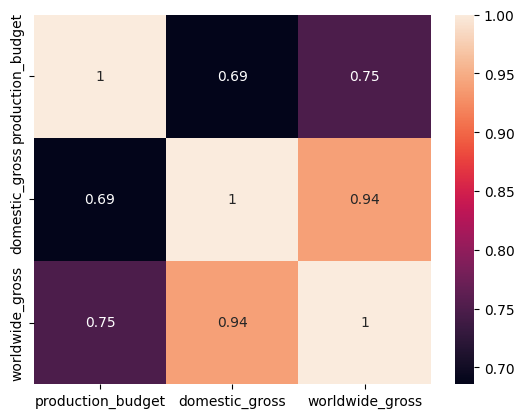

In [77]:
sns.heatmap(movie_Budgets_clean.corr(), annot= True);

### tmdb_movies exploration 

In [78]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [79]:
tmdb_movies.shape

(26517, 10)

In [80]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [81]:
tmdb_movies.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [82]:
tmdb_movies.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [83]:
tmdb_movies.nunique()

Unnamed: 0           26517
genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

In [84]:
tmdb_movies.duplicated().sum()

0

In [85]:
# Converting date columns to datetime
tmdb_movies['release_date'] = pd.to_datetime(tmdb_movies['release_date'])
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [86]:
# Drop columns that start with 'Unnamed' and the 'id' column
tmdb_movies = tmdb_movies.drop(columns=[col for col in tmdb_movies.columns if 'Unnamed' in col] + ['id'], errors='ignore')


In [87]:
# Select only numeric columns for correlation calculation
numeric_columns = tmdb_movies.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

              popularity  vote_average  vote_count
popularity      1.000000      0.065273    0.694849
vote_average    0.065273      1.000000    0.086370
vote_count      0.694849      0.086370    1.000000


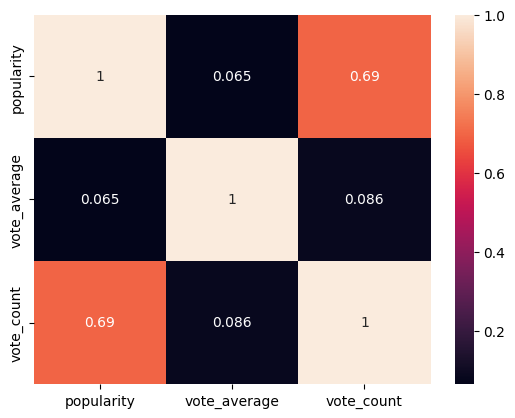

In [88]:
sns.heatmap(correlation_matrix, annot = True);

## Merging the two data sets using the title of the movie 

In [89]:
# Standardize movie titles for matching
movie_Budgets['movie_standardized'] = movie_Budgets['movie'].str.lower().str.strip()
tmdb_movies['title_standardized'] = tmdb_movies['title'].str.lower().str.strip()

In [90]:
# Merge based on standardized movie name and release date
merged_data = pd.merge(
    movie_Budgets,
    tmdb_movies,
    left_on=['movie_standardized', 'release_date'],
    right_on=['title_standardized', 'release_date'],
    how='inner'
)

In [91]:
merged_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_standardized,genre_ids,original_language,original_title,popularity,title,vote_average,vote_count,title_standardized
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,avatar,"[28, 12, 14, 878]",en,Avatar,26.526,Avatar,7.4,18676,avatar
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,pirates of the caribbean: on stranger tides,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571,pirates of the caribbean: on stranger tides
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,avengers: age of ultron,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,Avengers: Age of Ultron,7.3,13457,avengers: age of ultron
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,avengers: infinity war,"[12, 28, 14]",en,Avengers: Infinity War,80.773,Avengers: Infinity War,8.3,13948,avengers: infinity war
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,justice league,"[28, 12, 14, 878]",en,Justice League,34.953,Justice League,6.2,7510,justice league


In [92]:
merged_data.shape

(1438, 15)

In [93]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1438 non-null   int64         
 1   release_date        1438 non-null   datetime64[ns]
 2   movie               1438 non-null   object        
 3   production_budget   1438 non-null   float64       
 4   domestic_gross      1438 non-null   float64       
 5   worldwide_gross     1438 non-null   float64       
 6   movie_standardized  1438 non-null   object        
 7   genre_ids           1438 non-null   object        
 8   original_language   1438 non-null   object        
 9   original_title      1438 non-null   object        
 10  popularity          1438 non-null   float64       
 11  title               1438 non-null   object        
 12  vote_average        1438 non-null   float64       
 13  vote_count          1438 non-null   int64       

In [94]:
# calculate profit 
merged_data['profit'] = merged_data['worldwide_gross'] - merged_data['production_budget']
merged_data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_standardized,genre_ids,original_language,original_title,popularity,title,vote_average,vote_count,title_standardized,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,avatar,"[28, 12, 14, 878]",en,Avatar,26.526,Avatar,7.4,18676,avatar,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,pirates of the caribbean: on stranger tides,"[12, 28, 14]",en,Pirates of the Caribbean: On Stranger Tides,30.579,Pirates of the Caribbean: On Stranger Tides,6.4,8571,pirates of the caribbean: on stranger tides,6.350639e+08
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,avengers: age of ultron,"[28, 12, 878]",en,Avengers: Age of Ultron,44.383,Avengers: Age of Ultron,7.3,13457,avengers: age of ultron,1.072414e+09
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,avengers: infinity war,"[12, 28, 14]",en,Avengers: Infinity War,80.773,Avengers: Infinity War,8.3,13948,avengers: infinity war,1.748134e+09
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,justice league,"[28, 12, 14, 878]",en,Justice League,34.953,Justice League,6.2,7510,justice league,3.559452e+08


In [96]:
# Drop specified columns from the merged data
merged_data_cleaned = merged_data.drop(columns=['id', 'movie', 'original_title', 'title'])
merged_data_cleaned.head()

,release_date,production_budget,domestic_gross,worldwide_gross,movie_standardized,genre_ids,original_language,popularity,vote_average,vote_count,title_standardized,profit
0,2009-12-18,425000000.0,760507625.0,2.776345e+09,avatar,"[28, 12, 14, 878]",en,26.526,7.4,18676,avatar,2.351345e+09
1,2011-05-20,410600000.0,241063875.0,1.045664e+09,pirates of the caribbean: on stranger tides,"[12, 28, 14]",en,30.579,6.4,8571,pirates of the caribbean: on stranger tides,6.350639e+08
2,2015-05-01,330600000.0,459005868.0,1.403014e+09,avengers: age of ultron,"[28, 12, 878]",en,44.383,7.3,13457,avengers: age of ultron,1.072414e+09
3,2018-04-27,300000000.0,678815482.0,2.048134e+09,avengers: infinity war,"[12, 28, 14]",en,80.773,8.3,13948,avengers: infinity war,1.748134e+09
4,2017-11-17,300000000.0,229024295.0,6.559452e+08,justice league,"[28, 12, 14, 878]",en,34.953,6.2,7510,justice league,3.559452e+08


In [97]:
merged_data_cleaned.nunique()

release_date           576
production_budget      235
domestic_gross        1237
worldwide_gross       1263
movie_standardized    1303
genre_ids              500
original_language       17
popularity            1261
vote_average            54
vote_count            1069
title_standardized    1303
profit                1289
dtype: int64

In [98]:
merged_data_cleaned.describe()

,release_date,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,profit
count,1438,1.438000e+03,1.438000e+03,1.438000e+03,1438.000000,1438.000000,1438.000000,1.438000e+03
mean,2014-01-28 19:13:36.133518848,4.543531e+07,5.863978e+07,1.461444e+08,13.278962,6.336857,2213.035466,1.007091e+08
min,1977-11-16 00:00:00,2.000000e+04,0.000000e+00,0.000000e+00,0.600000,2.600000,1.000000,-1.104502e+08
25%,2012-04-27 00:00:00,9.000000e+06,5.355133e+06,1.072754e+07,8.350250,5.800000,358.500000,-4.998680e+05
50%,2014-10-13 12:00:00,2.500000e+07,3.010409e+07,5.735572e+07,11.492500,6.350000,1082.500000,2.676129e+07
75%,2016-10-05 06:00:00,5.800000e+07,6.902587e+07,1.608169e+08,16.296000,6.900000,2788.000000,1.084932e+08
max,2019-05-03 00:00:00,4.250000e+08,7.605076e+08,2.776345e+09,80.773000,9.000000,22186.000000,2.351345e+09
std,NaN,5.648356e+07,8.739604e+07,2.427338e+08,8.113250,0.875089,2969.786309,2.007883e+08
